In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\data_csv.csv", low_memory=False, encoding='cp949')

In [85]:
df.head()

,Num,User_ID,User_Name,Repository_Name,created_at,updated_at,pushed_at,CSS,JavaScript,CoffeeScript,...,AL,TXL,OpenQASM,Rouge,Gleam,Cadence,Zimpl,BrighterScript,wisp,Grace
0,1,1,mojombo,30daysoflaptops.github.io,2014-11-20T06:42:06Z,2021-04-03T10:15:42Z,2014-11-20T06:42:47Z,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,mojombo,asteroids,2014-03-03T07:40:00Z,2022-08-06T02:13:22Z,2015-03-10T18:18:16Z,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,mojombo,benbalter.github.com,2015-01-27T23:54:05Z,2021-01-13T19:44:45Z,2015-01-27T23:54:33Z,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,mojombo,bert,2009-10-08T06:06:25Z,2022-08-06T03:51:10Z,2016-04-18T15:19:42Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,mojombo,bert.erl,2009-12-21T02:10:34Z,2022-06-13T07:20:51Z,2010-01-08T00:12:10Z,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df['date'] = df['created_at']
df['year'] = df['created_at']
df['date'] = df.created_at.str[0:10] # 날짜 부분 추출
df['year'] = df.created_at.str[0:4]

df['date'] = pd.to_datetime(df.date)
dt = df.sort_values(by='date')

df.year


0         2014
1         2014
2         2015
3         2009
4         2009
          ... 
168955    2017
168956    2013
168957    2021
168958    2021
168959    2021
Name: year, Length: 168960, dtype: object

In [87]:
dt = dt.drop(['created_at'], axis=1)
dt = dt.drop(['updated_at'], axis=1)
dt = dt.drop(['pushed_at'], axis=1)


dt.head

<bound method NDFrame.head of            Num  User_ID  User_Name               Repository_Name  CSS  \
32          33        1    mojombo                          grit    0   
59251    59252     1264  cardmagic                     merb-core    0   
38875    38876      781     piclez                     merb-core    0   
48337    48338     1023    cobrien                     merb-core    0   
449        450       17    vanpelt                     jsawesome    0   
...        ...      ...        ...                           ...  ...   
161045  161046    77738    FRooter                       elevate    1   
161149  161150    46023  jtmueller                CodeMazeGuides    1   
157316  157317    77567     weotch                       colorit    1   
148005  148006    45498    ryochin  nagios-plugin-check-via-http    0   
147800  147801    77077   masatake                           dnf    0   

        JavaScript  CoffeeScript  Shell  Ruby  Perl  ...  OpenQASM  Rouge  \
32              

In [88]:
value = dt.sum()
value = value.drop("year")
sort_val = value.sort_values(ascending = False)
sort_val = sort_val.drop("Num")
sort_val = sort_val.drop("User_ID")

List_Lang = sort_val.index
List_Lang = List_Lang.to_list()

C:\Users\admin\AppData\Local\Temp\ipykernel_7372\2668225431.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  value = dt.sum()


In [108]:
def list_Chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

list_Chunked = list_Chunk(List_Lang, 10)

In [90]:
list_Chunked
List_top10 = list_Chunked[0]
List_top10

dt[List_top10]

,JavaScript,Shell,Ruby,HTML,CSS,Python,Makefile,C,Java,C++
32,0,0,1,0,0,0,0,0,0,0
59251,1,0,1,0,0,0,0,0,0,0
38875,1,0,1,0,0,0,0,0,0,0
48337,1,0,1,0,0,0,0,0,0,0
449,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
161045,1,1,0,1,1,0,1,0,0,0
161149,1,0,0,1,1,0,0,0,0,0
157316,1,0,0,1,1,0,0,0,0,0
148005,0,0,0,0,0,0,0,0,0,0


In [122]:
from re import T


grouped = dt[List_top10].groupby(dt['year']).sum()

"""
def ratio():  #비율 계산
    for i in range(1, 16):
        Total = 0
        for j in range(0, 10):
            Total += grouped.iloc[i][j]
        
        for j in range(0, 10):
            grouped.iloc[i][j] = int(round(grouped.iloc[i][j]/Total * 100,2))
ratio()
"""
grouped

,JavaScript,Shell,Ruby,HTML,CSS,Python,Makefile,C,Java,C++
year,,,,,,,,,,
2007,0,0,1,0,0,0,0,0,0,0
2008,19,7,50,2,2,6,1,5,2,2
2009,19,11,36,2,2,11,1,7,4,4
2010,21,11,33,2,2,11,1,8,4,3
2011,22,13,29,2,3,11,1,7,5,3
2012,23,14,26,2,4,11,1,6,5,3
2013,22,15,22,3,10,11,1,5,4,3
2014,20,14,16,4,17,10,3,4,4,4
2015,17,13,11,16,13,8,6,4,4,3


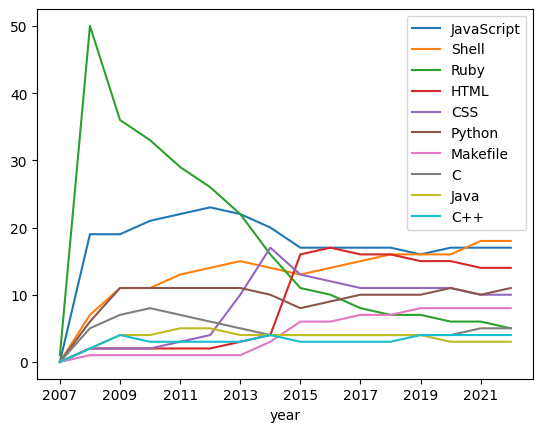

In [123]:
ax = grouped.plot(kind='line')